In [19]:
import tensorflow as tf 
import pandas as pd 
import seaborn as sns
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

## Data Processing

In [2]:
data_path = './archive/'

In [3]:
data = pd.read_csv(data_path + 'train.csv')
print(data.shape)
data.head()

(1000, 12)


,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [4]:
all_features = data.columns.to_list()
print(all_features)

['v.id', 'on road old', 'on road now', 'years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']


In [5]:
remove_features = ['v.id', 'on road old', 'on road now']
features = [feature for feature in all_features if feature not in remove_features]
print(features)

['years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']


In [6]:
# sns.pairplot(data[features], diag_kind='kde')

In [7]:
data.corr()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
v.id,1.000000,-0.029926,-0.030787,-0.034255,0.047400,-0.018263,-0.038548,0.047137,0.001613,-0.006997,-0.000632,-0.059460
on road old,-0.029926,1.000000,0.034113,0.007207,0.007488,-0.050717,-0.015682,-0.030097,-0.023816,-0.049266,0.008950,0.233035
on road now,-0.030787,0.034113,1.000000,0.004609,-0.053202,0.028280,-0.005043,-0.015880,0.012699,-0.012719,0.017955,0.282793
years,-0.034255,0.007207,0.004609,1.000000,-0.002089,0.027285,0.053579,0.050220,0.025148,-0.003272,0.028859,-0.011854
km,0.047400,0.007488,-0.053202,-0.002089,1.000000,-0.039930,-0.013640,0.032680,0.026450,-0.052918,0.013566,-0.935924
rating,-0.018263,-0.050717,0.028280,0.027285,-0.039930,1.000000,0.015943,-0.009757,-0.042222,-0.022623,0.004408,0.035038
condition,-0.038548,-0.015682,-0.005043,0.053579,-0.013640,0.015943,1.000000,0.058788,0.018472,-0.071552,0.047805,0.110108
economy,0.047137,-0.030097,-0.015880,0.050220,0.032680,-0.009757,0.058788,1.000000,-0.059402,-0.016782,0.041632,-0.034711
top speed,0.001613,-0.023816,0.012699,0.025148,0.026450,-0.042222,0.018472,-0.059402,1.000000,0.057827,-0.019697,-0.027993
hp,-0.006997,-0.049266,-0.012719,-0.003272,-0.052918,-0.022623,-0.071552,-0.016782,0.057827,1.000000,-0.013817,0.030238


## Convert data to tensor data

In [8]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, dtype=tf.float32)
print(tensor_data.shape)
print(tensor_data)

(1000, 12)
tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [9]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[1.950000e+02 5.680400e+05 8.774890e+05 5.000000e+00 1.366220e+05
  2.000000e+00 3.000000e+00 1.200000e+01 1.640000e+02 1.190000e+02
  7.500000e+01 1.751025e+05]
 [3.350000e+02 5.533510e+05 7.470140e+05 7.000000e+00 8.195500e+04
  5.000000e+00 3.000000e+00 1.400000e+01 1.900000e+02 8.700000e+01
  7.000000e+01 3.159145e+05]
 [3.500000e+01 6.304890e+05 7.171820e+05 5.000000e+00 9.622600e+04
  1.000000e+00 9.000000e+00 8.000000e+00 1.910000e+02 1.010000e+02
  9.400000e+01 3.171190e+05]
 [3.740000e+02 5.134850e+05 7.306280e+05 4.000000e+00 1.402960e+05
  4.000000e+00 5.000000e+00 1.500000e+01 2.000000e+02 9.400000e+01
  8.500000e+01 6.273700e+04]
 [1.360000e+02 6.257470e+05 7.802630e+05 5.000000e+00 1.256940e+05
  2.000000e+00 7.000000e+00 1.300000e+01 1.550000e+02 8.600000e+01
  1.230000e+02 2.073525e+05]], shape=(5, 12), dtype=float32)


In [10]:
x = tensor_data[:, 3:-1]
print(x.shape)
print(x[:5])

(1000, 8)
tf.Tensor(
[[5.00000e+00 1.36622e+05 2.00000e+00 3.00000e+00 1.20000e+01 1.64000e+02
  1.19000e+02 7.50000e+01]
 [7.00000e+00 8.19550e+04 5.00000e+00 3.00000e+00 1.40000e+01 1.90000e+02
  8.70000e+01 7.00000e+01]
 [5.00000e+00 9.62260e+04 1.00000e+00 9.00000e+00 8.00000e+00 1.91000e+02
  1.01000e+02 9.40000e+01]
 [4.00000e+00 1.40296e+05 4.00000e+00 5.00000e+00 1.50000e+01 2.00000e+02
  9.40000e+01 8.50000e+01]
 [5.00000e+00 1.25694e+05 2.00000e+00 7.00000e+00 1.30000e+01 1.55000e+02
  8.60000e+01 1.23000e+02]], shape=(5, 8), dtype=float32)


In [11]:
y = tensor_data[:, -1]
y = tf.expand_dims(y, axis=1)
print(y.shape)
print(y[:5])

(1000, 1)
tf.Tensor(
[[175102.5]
 [315914.5]
 [317119. ]
 [ 62737. ]
 [207352.5]], shape=(5, 1), dtype=float32)


## Normalization
$$
\text{normalization} = \frac{X - \mu}{\sigma}, \quad \text{where $\mu$ = mean and $\sigma$ = std}
$$
```
Normalization()
```
Default axis = -1 means mean and std will be calculated based on columns, and then normalization will be performed along the columns.

In [12]:
normalizer = Normalization()
normalizer.adapt(x)
normalizer(x)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 0.25549683,  1.2475196 , -0.70466226, -0.91816014,  0.16820414,
        -0.15006122,  1.6801357 , -1.3503773 ],
       [ 1.4194924 , -0.6287578 ,  1.4350007 , -0.91816014,  1.065293  ,
         1.1985751 ,  0.11966845, -1.5879275 ],
       [ 0.25549683, -0.13894941, -1.4178833 ,  1.2072105 , -1.6259733 ,
         1.2504458 ,  0.8023729 , -0.44768655],
       [-0.32650095,  1.3736184 ,  0.7217797 , -0.20970325,  1.5138373 ,
         1.7172815 ,  0.46102068, -0.8752769 ],
       [ 0.25549683,  0.8724494 , -0.70466226,  0.49875367,  0.6167485 ,
        -0.61689687,  0.07090385,  0.93010455]], dtype=float32)>

In [13]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(8,)),
    normalizer,
    Dense(1)  # as we need only one output for current_price.
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 8)                 17        
 on)                                                             
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 26 (108.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________


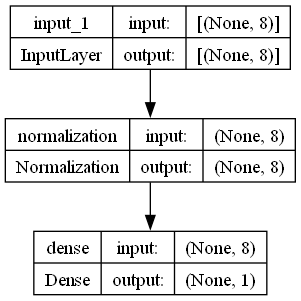

In [14]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

## Training and Optimization

In [15]:
model.compile(
    optimizer=Adam(),
    loss=MeanAbsoluteError(),
    metrics = RootMe
)

In [16]:
history = model.fit(x, y, epochs=100, verbose=1)

Epoch 1/100

32/32 [==============================] - 1s 3ms/step - loss: 308520.2188
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 308520.1562
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 308520.1562
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 308520.1562
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 308520.0625
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 308520.0625
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 308520.0625
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 308520.0000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 308519.9688
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 308519.9375
Epoch 11/100
32/32 [==============================] - 0s 3ms/step - loss: 308519.9062
Epoch 12/100
32/32 [==============================] - 0s 2ms/s

In [17]:
history_data = history.history['loss']
print(history_data)

[308520.21875, 308520.15625, 308520.15625, 308520.15625, 308520.0625, 308520.0625, 308520.0625, 308520.0, 308519.96875, 308519.9375, 308519.90625, 308519.84375, 308519.875, 308519.8125, 308519.75, 308519.75, 308519.71875, 308519.6875, 308519.6875, 308519.59375, 308519.625, 308519.53125, 308519.53125, 308519.5, 308519.46875, 308519.46875, 308519.375, 308519.375, 308519.25, 308519.3125, 308519.21875, 308519.21875, 308519.1875, 308519.1875, 308519.125, 308519.125, 308519.03125, 308519.09375, 308519.0, 308518.96875, 308518.9375, 308518.90625, 308518.84375, 308518.875, 308518.8125, 308518.8125, 308518.71875, 308518.75, 308518.71875, 308518.65625, 308518.65625, 308518.5625, 308518.59375, 308518.59375, 308518.5, 308518.5, 308518.4375, 308518.40625, 308518.375, 308518.34375, 308518.28125, 308518.28125, 308518.28125, 308518.21875, 308518.21875, 308518.125, 308518.125, 308518.03125, 308518.09375, 308518.03125, 308517.96875, 308517.9375, 308517.90625, 308517.90625, 308517.8125, 308517.8125, 30851

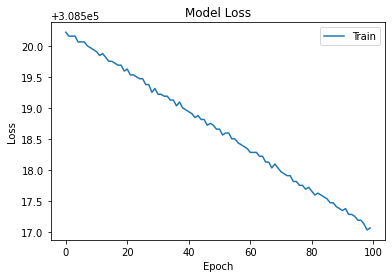

In [18]:
plt.plot(history_data)
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train'])
plt.show()

## Performance measurements